In [7]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
import cmocean.cm as cmo
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}
from matplotlib.patches import Rectangle

In [8]:
path = "../data_for_plots/" 

In [9]:
iso = xr.open_mfdataset(path + "isopycnal_eddy_heat_transports_0201-01-01_0300-12-30_zonal_vertical_integral.nc")

In [10]:
iso_totalminusSTD = iso.iso_total - iso.iso_totalstd
iso_totalplusSTD = iso.iso_total + iso.iso_totalstd
iso_totaleddyminusSTD = iso.iso_totaleddy - iso.iso_totaleddystd
iso_totaleddyplusSTD = iso.iso_totaleddy + iso.iso_totaleddystd
iso_totaleddy_anticyclonesminusSTD = iso.iso_totaleddy_anticyclones - iso.iso_totaleddy_anticyclonesstd
iso_totaleddy_anticyclonesplusSTD = iso.iso_totaleddy_anticyclones + iso.iso_totaleddy_anticyclonesstd
iso_totaleddy_cyclonesminusSTD = iso.iso_totaleddy_cyclones - iso.iso_totaleddy_cyclonesstd
iso_totaleddy_cyclonesplusSTD = iso.iso_totaleddy_cyclones + iso.iso_totaleddy_cyclonesstd

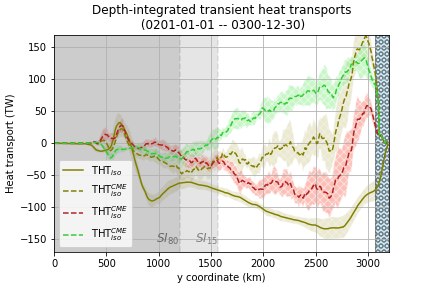

In [11]:
fig, ax = plt.subplots(1)

iso.iso_total.plot(label="THT$_{iso}$", color="olive", ls="-")
ax.fill_between(iso.YG, iso_totalminusSTD, iso_totalplusSTD, fc="darkkhaki", ec="w", hatch="xxx", alpha=0.3)
iso.iso_totaleddy.plot(label="THT$_{iso}^{CME}$", color="olive", ls="--")
ax.fill_between(iso.YG, iso_totaleddyminusSTD, iso_totaleddyplusSTD, fc="darkkhaki", ec="w", hatch="xxx", alpha=0.3)
iso.iso_totaleddy_anticyclones.plot(label="THT$_{iso}^{CME}$", color="firebrick", ls="--")
ax.fill_between(iso.YG, iso_totaleddy_anticyclonesminusSTD, iso_totaleddy_anticyclonesplusSTD, 
                fc="salmon", ec="w", hatch="xxx", alpha=0.5)
iso.iso_totaleddy_cyclones.plot(label="THT$_{iso}^{CME}$", color="limegreen", ls="--")
ax.fill_between(iso.YG, iso_totaleddy_cyclonesminusSTD, iso_totaleddy_cyclonesplusSTD, 
                fc="lightgreen", ec="w", hatch="xxx", alpha=0.5)

plt.legend(loc=3)
plt.grid()
plt.title("Depth-integrated transient heat transports\n (0201-01-01 -- 0300-12-30)")
plt.ylabel("Heat transport (TW)")
plt.xticks(np.arange(0, 3.2e6, 0.5e6), np.arange(0, 3200, 500))
plt.xlabel("y coordinate (km)")
plt.xlim(0, 3.2e6)
plt.ylim(-170, 170)

ax.vlines(1.57e6, -170, 170,  colors='gray', linestyle='--', alpha=0.2)
ax.add_patch(Rectangle((0, -170), 1.57e6, 340, alpha=0.2, facecolor="gray", edgecolor=None))
ax.text(1.57e6, -156, r"$SI_{15} $", ha="right", fontsize=12, color="gray")
ax.vlines(1.2e6, -170, 170,  colors='dimgray', linestyle='--', alpha=0.2)
ax.add_patch(Rectangle((0, -170), 1.2e6, 340, alpha=0.2, facecolor="dimgray", edgecolor=None))
ax.text(1.2e6, -156, r"$SI_{80} $", ha="right", fontsize=12, color="dimgray")

ax.add_patch(Rectangle((3.07e6, -170), 0.13e6, 340, alpha=0.4, facecolor="skyblue", hatch="OO", edgecolor="k"))

plt.savefig("figS02-isopycnals_anticyclones_cyclones.png", dpi=300)